In [1]:
import pandas as pd
import numpy as np
from joblib import dump
from joblib import load
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split

In [2]:
df = pd.read_csv("../Data/Interpolated_soil_combined/combined_zones.csv")

# Define the function that will assign the soil test
def assign_soil_test(field_id):
    if field_id in ['16A', '6-12', 'SW16']:
        return 'Mehlich'
    elif field_id in ['Y10', 'Y8']:
        return 'Haney'
    else:
        return None  # or some default value

# Create the new column
df['Soil_Test'] = df['FieldID'].apply(assign_soil_test)

rainfall = {2018: 350, 
            2019: 505,
            2020: 481,
            2022: 279}

df['Rainfall'] = df['Year'].map(rainfall)

df = df[['Longitude', 'Latitude',
       'Yield', 'Moisture', 'PlotID', 'FieldID', 'TOC_0_2', 'IC_0_2', 'TN_0_2', 
                           'DI_Al_0_2', 'DI_Ca_0_2', 'DI_Fe_0_2', 'DI_K_0_2', 'DI_Mg_0_2', 'DI_P_0_2', 
                           'H3A_Al_0_2', 'H3A_Ca_0_2', 'H3A_Fe_0_2', 'H3A_K_0_2', 'H3A_Mg_0_2', 'H3A_P_0_2',
                           'M3_Al_0_2', 'M3_Ca_0_2', 'M3_Fe_0_2', 'M3_K_0_2', 'M3_Mg_0_2', 'M3_P_0_2',
                           'Ols_Al_0_2', 'Ols_Ca_0_2', 'Ols_Fe_0_2', 'Ols_K_0_2', 'Ols_Mg_0_2', 'Ols_P_0_2',
                           'TOC_2_6', 'IC_2_6', 'TN_2_6',
                           'DI_Al_2_6', 'DI_Ca_2_6', 'DI_Fe_2_6', 'DI_K_2_6', 'DI_Mg_2_6', 'DI_P_2_6', 
                           'H3A_Al_2_6', 'H3A_Ca_2_6', 'H3A_Fe_2_6', 'H3A_K_2_6', 'H3A_Mg_2_6', 'H3A_P_2_6', 
                           'M3_Al_2_6', 'M3_Ca_2_6', 'M3_Fe_2_6', 'M3_K_2_6', 'M3_Mg_2_6', 'M3_P_2_6',
                           'Ols_Al_2_6', 'Ols_Ca_2_6', 'Ols_Fe_2_6', 'Ols_K_2_6', 'Ols_Mg_2_6', 'Ols_P_2_6',
                           'Rainfall', 'PhosphorusTreatment',
        'Zone_1', 'Zone_2', 'Zone_3', 'Zone_4']]

#'TC_0_2', 'TC_2_6', 'elevation', 'slope','aspect', 

In [5]:
# Define your features and the column to predict
feature_cols = df.columns[df.columns.get_loc('TOC_0_2'):]
output_col = 'Yield'

# Define the grid of parameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# For each year and soil test, train a random forest and save the model and results
X = df[feature_cols]
y = df[output_col]

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit model
rf = RandomForestRegressor()
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get best model
best_model = grid_search.best_estimator_

# Compute metrics on test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Save results
results = {
    'model_name': f'Full_model',
    'num_input_params': len(feature_cols),
    'r2': r2,
    'mse': mse,
    'features_importances': {feature: importance for feature, importance in zip(feature_cols, best_model.feature_importances_)},
}
dump(grid_search.best_estimator_, f'best_model_Full_model.joblib')

['best_model_Full_model.joblib']

Bad pipe message: %s [b'\xad-\x1b\x89P`W\xa0|"`\xcf\x0cW.\xfc\xfd\x8d\x00\x01p\x00\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00\x07\x00\x08\x00\t\x00\n\x00\x0b\x00\x0c\x00\r\x00\x0e\x00\x0f\x00\x10\x00\x11\x00\x12\x00\x13\x00\x14\x00\x15\x00\x16\x00\x17\x00\x18\x00\x19\x00\x1a\x00\x1b\x00/\x000\x001\x002\x003\x004\x005\x006\x007\x008\x009\x00:\x00;\x00<\x00=\x00>\x00?\x00@\x00g\x00h\x00i\x00j\x00k\x00l\x00m\x00A\x00B\x00C\x00D\x00E\x00F\x00\x84\x00\x85\x00\x86\x00\x87\x00\x88\x00\x89\x00\xba\x00\xbb\x00\xbc\x00\xbd\x00\xbe\x00\xbf\x00\xc0\x00\xc1\x00\xc2\x00\xc3\x00\xc4\x00\xc5\x00\x9c\x00\x9d\x00\x9e\x00\x9f\x00\xa0\x00\xa1\x00\xa2\x00\xa3\x00\xa4\x00', b"\xa6\x00\xa7\xc0\x01\xc0\x02\xc0\x03\xc0\x04\xc0\x05\xc0\x06\xc0\x07\xc0\x08\xc0\t\xc0\n\xc0\x0b\xc0\x0c\xc0\r\xc0\x0e\xc0\x0f\xc0\x10\xc0\x11\xc0\x12\xc0\x13\xc0\x14\xc0\x15\xc0\x16\xc0\x17\xc0\x18\xc0\x19\xc0#\xc0$\xc0%\xc0&\xc0'\xc0(\xc0)\xc0*\xc0+\xc0,\xc0-\xc0.\xc0/\xc01\xc00\xc02\xc0s\xc0r\xc0t\xc0u\xc0v\xc0w\xc0x\xc0z\xc0y\

In [3]:
# Write code to read in best param files and perform random forest
# Get best model
# Load model
best_model = load('best_model_Full_model.joblib')

# Get best parameters
best_params = best_model.get_params()

feature_cols = df.columns[df.columns.get_loc('TOC_0_2'):]
output_col = 'Yield'

# For each year and soil test, train a random forest and save the model and results
X = df[feature_cols]
y = df[output_col]

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute metrics on test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Save results
results = {
    'model_name': f'Full_model',
    'num_input_params': len(feature_cols),
    'r2': r2,
    'mse': mse,
    'features_importances': {feature: importance for feature, importance in zip(feature_cols, best_model.feature_importances_)},
}

In [4]:
results

{'model_name': 'Full_model',
 'num_input_params': 60,
 'r2': 0.8824349174418271,
 'mse': 202.84353543819302,
 'features_importances': {'TOC_0_2': 0.00643771691207553,
  'IC_0_2': 0.006063893837730389,
  'TN_0_2': 0.005446338985762952,
  'DI_Al_0_2': 0.0047288543651233155,
  'DI_Ca_0_2': 0.005981069088603966,
  'DI_Fe_0_2': 0.004304375819563693,
  'DI_K_0_2': 0.004236616856359295,
  'DI_Mg_0_2': 0.003887253710286997,
  'DI_P_0_2': 0.0041332998018030745,
  'H3A_Al_0_2': 0.006553785290240395,
  'H3A_Ca_0_2': 0.004727051490058811,
  'H3A_Fe_0_2': 0.01008006470869347,
  'H3A_K_0_2': 0.005538611975141329,
  'H3A_Mg_0_2': 0.007383423077602884,
  'H3A_P_0_2': 0.007800755990078853,
  'M3_Al_0_2': 0.012176369907826718,
  'M3_Ca_0_2': 0.024173629870742147,
  'M3_Fe_0_2': 0.024111049681244386,
  'M3_K_0_2': 0.006180449135576743,
  'M3_Mg_0_2': 0.0074081026370671444,
  'M3_P_0_2': 0.004815078162262508,
  'Ols_Al_0_2': 0.004218789810339555,
  'Ols_Ca_0_2': 0.009143722261533016,
  'Ols_Fe_0_2': 0.004

In [7]:
results

{'model_name': 'Full_model',
 'num_input_params': 56,
 'r2': 0.8905826634522036,
 'mse': 188.78564026528394,
 'features_importances': {'TOC_0_2': 0.005716116570333543,
  'IC_0_2': 0.010588448427946246,
  'TN_0_2': 0.00537665805707863,
  'DI_Al_0_2': 0.004521907502695636,
  'DI_Ca_0_2': 0.005289123600154105,
  'DI_Fe_0_2': 0.0045600674635398394,
  'DI_K_0_2': 0.005120984393463044,
  'DI_Mg_0_2': 0.004293782041389646,
  'DI_P_0_2': 0.003767074842670939,
  'H3A_Al_0_2': 0.004923304465767413,
  'H3A_Ca_0_2': 0.004809441671107396,
  'H3A_Fe_0_2': 0.01984192120935984,
  'H3A_K_0_2': 0.004960109455789547,
  'H3A_Mg_0_2': 0.007030282388834371,
  'H3A_P_0_2': 0.005649913121424665,
  'M3_Al_0_2': 0.012959716924275874,
  'M3_Ca_0_2': 0.027618881923528713,
  'M3_Fe_0_2': 0.013920184820147953,
  'M3_K_0_2': 0.00601724497845423,
  'M3_Mg_0_2': 0.006557109489991419,
  'M3_P_0_2': 0.004532111985911714,
  'Ols_Al_0_2': 0.004471950854591753,
  'Ols_Ca_0_2': 0.007310184690454614,
  'Ols_Fe_0_2': 0.006163

In [5]:
results['r2']*results['features_importances']['Rainfall']

0.5062307360331986

In [6]:
results['r2']*results['features_importances']['PhosphorusTreatment']

0.006727808968943091

In [28]:
# # Define a dictionary mapping the 'Year' to the corresponding mean temp (°C) value
# temp_data = {2018: 34.0, 2019: 28.2, 2020: 30.5, 2022: 34.4}

# # Use the 'Year' column to map the corresponding 'Rainfall' value and create a new column
# df['Temp'] = df['Year'].map(temp_data)

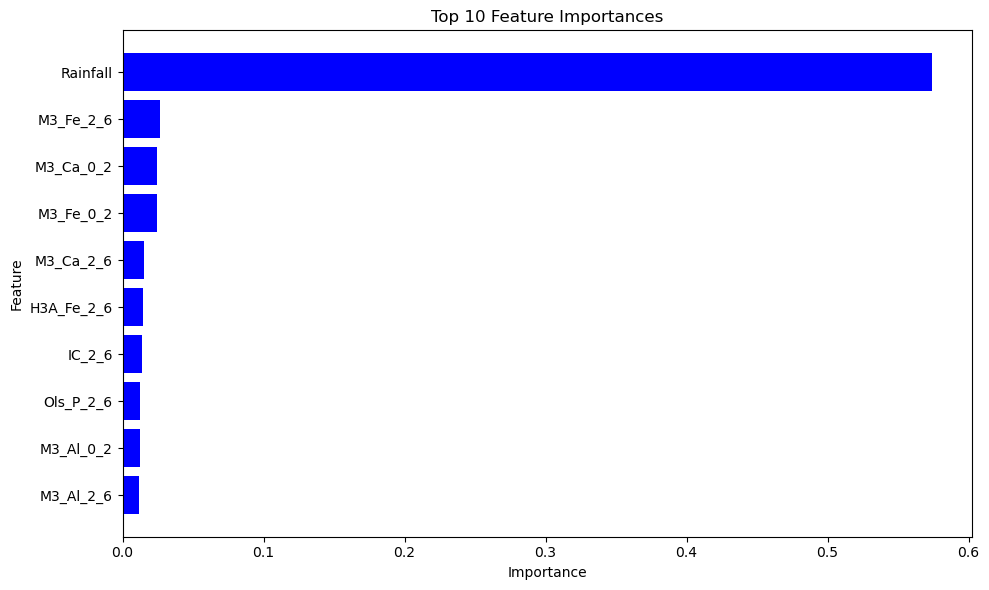

In [7]:
# Extract feature importances from the best model
feature_importances = best_model.feature_importances_

# Create a list of (feature, importance) tuples and sort by importance
sorted_feature_importances = sorted(zip(feature_cols, feature_importances), key=lambda x: x[1], reverse=True)

# Extract top 10 features and their importances
top_features = [feature for feature, importance in sorted_feature_importances[:10]]
top_importances = [importance for feature, importance in sorted_feature_importances[:10]]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances, align='center', color='blue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.tight_layout()

In [14]:
base_cols = ['TOC_0_2', 'IC_0_2', 'TN_0_2', 'TOC_2_6', 'IC_2_6', 'TN_2_6', 'PhosphorusTreatment']

def get_feature_cols(prefixes, include_rainfall=False):
    # Filtering function to get columns based on prefixes
    cols = [col for col in df.columns if any(prefix in col for prefix in prefixes)]
    return base_cols + cols + (['Rainfall'] if include_rainfall else [])

combinations = [
    (['DI', 'H3A'], False),
    (['DI', 'H3A'], True),
    (['M3'], False),
    (['M3'], True),
    (['Ols'], False),
    (['Ols'], True)
]

In [16]:
output_col = 'Yield'

# Define the grid of parameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

all_results = []
for prefixes, include_rainfall in combinations:
    feature_cols = get_feature_cols(prefixes, include_rainfall)
    X = df[feature_cols]
    y = df[output_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf = RandomForestRegressor()
    grid_search = GridSearchCV(rf, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Storing results
    results = {
        'model_name': f"Model_{prefixes}_{'withRain' if include_rainfall else 'withoutRain'}",
        'num_input_params': len(feature_cols),
        'r2': r2,
        'mse': mse,
        'features_importances': {feature: importance for feature, importance in zip(feature_cols, best_model.feature_importances_)}
    }
    all_results.append(results)
    dump(best_model, f'best_model_{results["model_name"]}.joblib')

print(all_results)

Bad pipe message: %s [b'\x8d\x07O(W\xdba\xaafT\xb0&\xd3\x81\x99\xfb\x0c\xc4\x00\x01p\x00\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00\x07\x00\x08\x00\t\x00\n\x00\x0b\x00\x0c\x00\r\x00\x0e\x00\x0f\x00\x10\x00\x11\x00\x12\x00\x13\x00\x14\x00\x15\x00\x16\x00\x17\x00\x18\x00\x19\x00\x1a\x00\x1b\x00/\x000\x001\x002\x003\x004\x005\x006\x007\x008\x009\x00:\x00;\x00<\x00=\x00>\x00?\x00@\x00g\x00h\x00i\x00j\x00k\x00l\x00m\x00A\x00B\x00C\x00D\x00E\x00F\x00\x84\x00\x85\x00\x86\x00\x87\x00\x88\x00\x89\x00\xba\x00\xbb\x00\xbc\x00\xbd\x00\xbe\x00\xbf\x00\xc0\x00\xc1\x00\xc2\x00\xc3\x00\xc4\x00\xc5\x00\x9c\x00\x9d\x00\x9e\x00\x9f\x00\xa0\x00\xa1\x00\xa2\x00\xa3\x00', b"\xa5\x00\xa6\x00\xa7\xc0\x01\xc0\x02\xc0\x03\xc0\x04\xc0\x05\xc0\x06\xc0\x07\xc0\x08\xc0\t\xc0\n\xc0\x0b\xc0\x0c\xc0\r\xc0\x0e\xc0\x0f\xc0\x10\xc0\x11\xc0\x12\xc0\x13\xc0\x14\xc0\x15\xc0\x16\xc0\x17\xc0\x18\xc0\x19\xc0#\xc0$\xc0%\xc0&\xc0'\xc0(\xc0)\xc0*\xc0+\xc0,\xc0-\xc0.\xc0/\xc01\xc00\xc02\xc0s\xc0r\xc0t\xc0u\xc0v\xc0w\xc0x\xc0z

[{'model_name': "Model_['DI', 'H3A']_withoutRain", 'num_input_params': 31, 'r2': 0.12376432898942691, 'mse': 1511.8327441899626, 'features_importances': {'TOC_0_2': 0.03680871996383631, 'IC_0_2': 0.045029725960866976, 'TN_0_2': 0.029830200486608654, 'TOC_2_6': 0.028500990532319356, 'IC_2_6': 0.07734420746850527, 'TN_2_6': 0.025566752197345142, 'PhosphorusTreatment': 0.027732965501284058, 'DI_Al_0_2': 0.02035046844456046, 'DI_Ca_0_2': 0.021685663404893623, 'DI_Fe_0_2': 0.020054657705317232, 'DI_K_0_2': 0.019309987851691583, 'DI_Mg_0_2': 0.01714404295901402, 'DI_P_0_2': 0.01843911244528192, 'H3A_Al_0_2': 0.034669636728268984, 'H3A_Ca_0_2': 0.021740706112752185, 'H3A_Fe_0_2': 0.08178053659009049, 'H3A_K_0_2': 0.02745050513838296, 'H3A_Mg_0_2': 0.041585142381476675, 'H3A_P_0_2': 0.03537596534838327, 'DI_Al_2_6': 0.016293915118312376, 'DI_Ca_2_6': 0.019562646373087026, 'DI_Fe_2_6': 0.019064657616524764, 'DI_K_2_6': 0.018431791740165668, 'DI_Mg_2_6': 0.03952316335193134, 'DI_P_2_6': 0.025569

Bad pipe message: %s [b'V\x17\xf3\xb1%5\\\xffU^\x8eE\xbc\xa8c\xad\x07@\x00\x01p\x00\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00\x07\x00\x08\x00\t\x00\n\x00\x0b\x00\x0c\x00\r\x00\x0e\x00\x0f\x00\x10\x00\x11\x00\x12\x00\x13\x00\x14\x00\x15\x00\x16\x00\x17\x00\x18\x00\x19\x00\x1a\x00\x1b\x00']
Bad pipe message: %s [b'0\x001\x002\x003\x004\x005\x006\x007\x008\x009\x00:\x00;\x00<\x00=\x00>\x00?\x00@\x00g\x00h\x00i\x00j\x00k\x00l\x00']
Bad pipe message: %s [b'A\x00B\x00C\x00D\x00E\x00F\x00\x84\x00\x85\x00\x86\x00\x87\x00\x88\x00\x89\x00\xba\x00\xbb\x00\xbc\x00\xbd\x00\xbe\x00\xbf\x00\xc0\x00\xc1\x00\xc2\x00\xc3\x00\xc4\x00\xc5\x00\x9c\x00\x9d\x00\x9e\x00\x9f\x00\xa0\x00\xa1\x00\xa2\x00\xa3\x00\xa4\x00\xa5\x00\xa6\x00\xa7\xc0\x01\xc0\x02\xc0\x03\xc0\x04\xc0\x05\xc0\x06\xc0\x07\xc0\x08\xc0\t\xc0\n\xc0\x0b\xc0\x0c\xc0\r\xc0\x0e\xc0\x0f\xc0\x10\xc0\x11\xc0\x12\xc0']
Bad pipe message: %s [b'\x14\xc0\x15\xc0\x16\xc0\x17\xc0\x18\xc0\x19\xc0#\xc0$\xc0%\xc0']
Bad pipe message: %s [b"'\xc0(\xc0)\x

In [23]:
all_results = [{'model_name': "Model_['DI', 'H3A']_withoutRain", 'num_input_params': 31, 'r2': 0.12376432898942691, 'mse': 1511.8327441899626, 'features_importances': {'TOC_0_2': 0.03680871996383631, 'IC_0_2': 0.045029725960866976, 'TN_0_2': 0.029830200486608654, 'TOC_2_6': 0.028500990532319356, 'IC_2_6': 0.07734420746850527, 'TN_2_6': 0.025566752197345142, 'PhosphorusTreatment': 0.027732965501284058, 'DI_Al_0_2': 0.02035046844456046, 'DI_Ca_0_2': 0.021685663404893623, 'DI_Fe_0_2': 0.020054657705317232, 'DI_K_0_2': 0.019309987851691583, 'DI_Mg_0_2': 0.01714404295901402, 'DI_P_0_2': 0.01843911244528192, 'H3A_Al_0_2': 0.034669636728268984, 'H3A_Ca_0_2': 0.021740706112752185, 'H3A_Fe_0_2': 0.08178053659009049, 'H3A_K_0_2': 0.02745050513838296, 'H3A_Mg_0_2': 0.041585142381476675, 'H3A_P_0_2': 0.03537596534838327, 'DI_Al_2_6': 0.016293915118312376, 'DI_Ca_2_6': 0.019562646373087026, 'DI_Fe_2_6': 0.019064657616524764, 'DI_K_2_6': 0.018431791740165668, 'DI_Mg_2_6': 0.03952316335193134, 'DI_P_2_6': 0.025569687587868765, 'H3A_Al_2_6': 0.029288574948862743, 'H3A_Ca_2_6': 0.02290103267207195, 'H3A_Fe_2_6': 0.09044876887147237, 'H3A_K_2_6': 0.02045657734389786, 'H3A_Mg_2_6': 0.029144427369876068, 'H3A_P_2_6': 0.03891476978504987}}, {'model_name': "Model_['DI', 'H3A']_withRain", 'num_input_params': 32, 'r2': 0.9086886181168791, 'mse': 157.54612784586192, 'features_importances': {'TOC_0_2': 0.009590698815281325, 'IC_0_2': 0.02359366795190636, 'TN_0_2': 0.011271775822055595, 'TOC_2_6': 0.00830016265399097, 'IC_2_6': 0.023797658104898485, 'TN_2_6': 0.010306350778103837, 'PhosphorusTreatment': 0.010611110722456955, 'DI_Al_0_2': 0.006906915115447335, 'DI_Ca_0_2': 0.010564028374429397, 'DI_Fe_0_2': 0.007775996367551366, 'DI_K_0_2': 0.007378525425421851, 'DI_Mg_0_2': 0.006435893022139722, 'DI_P_0_2': 0.006123267877587113, 'H3A_Al_0_2': 0.012931254504185245, 'H3A_Ca_0_2': 0.007390469672282818, 'H3A_Fe_0_2': 0.03637606790404338, 'H3A_K_0_2': 0.009459078054165992, 'H3A_Mg_0_2': 0.01691407973225764, 'H3A_P_0_2': 0.01670349012231013, 'DI_Al_2_6': 0.006388786049632103, 'DI_Ca_2_6': 0.008939509554642427, 'DI_Fe_2_6': 0.007495173801629046, 'DI_K_2_6': 0.006511271477486122, 'DI_Mg_2_6': 0.014360557389194763, 'DI_P_2_6': 0.00946214080374592, 'H3A_Al_2_6': 0.008050202386831, 'H3A_Ca_2_6': 0.008194772582933794, 'H3A_Fe_2_6': 0.028735078657121185, 'H3A_K_2_6': 0.007451909354780266, 'H3A_Mg_2_6': 0.014772357276915728, 'H3A_P_2_6': 0.011603326522699296, 'Rainfall': 0.6256044231218728}}, {'model_name': "Model_['M3']_withoutRain", 'num_input_params': 19, 'r2': 0.11745447853743174, 'mse': 1522.7195852988918, 'features_importances': {'TOC_0_2': 0.03720819759742991, 'IC_0_2': 0.05352764522480956, 'TN_0_2': 0.03123964633748037, 'TOC_2_6': 0.03454230805347455, 'IC_2_6': 0.05184402988113317, 'TN_2_6': 0.03205434951642092, 'PhosphorusTreatment': 0.03385204426699357, 'M3_Al_0_2': 0.07677850159276996, 'M3_Ca_0_2': 0.11695275070693237, 'M3_Fe_0_2': 0.07554064047067727, 'M3_K_0_2': 0.0394276427913982, 'M3_Mg_0_2': 0.0387257916866125, 'M3_P_0_2': 0.0338133770124641, 'M3_Al_2_6': 0.05260647847000116, 'M3_Ca_2_6': 0.07987880246520408, 'M3_Fe_2_6': 0.09110779237017573, 'M3_K_2_6': 0.029339844629338488, 'M3_Mg_2_6': 0.04829545454484961, 'M3_P_2_6': 0.043264702381834566}}, {'model_name': "Model_['M3']_withRain", 'num_input_params': 20, 'r2': 0.9289360615811594, 'mse': 122.6117499973429, 'features_importances': {'TOC_0_2': 0.013503951469648182, 'IC_0_2': 0.01700050688072355, 'TN_0_2': 0.01114894461807646, 'TOC_2_6': 0.009232409877924886, 'IC_2_6': 0.02465840400507694, 'TN_2_6': 0.010656219254114613, 'PhosphorusTreatment': 0.013305144988452845, 'M3_Al_0_2': 0.026175280033538955, 'M3_Ca_0_2': 0.03304012435345086, 'M3_Fe_0_2': 0.025647755500561906, 'M3_K_0_2': 0.01358553655390757, 'M3_Mg_0_2': 0.016396647608551206, 'M3_P_0_2': 0.010732678661162988, 'M3_Al_2_6': 0.01970451562195223, 'M3_Ca_2_6': 0.03360461372921226, 'M3_Fe_2_6': 0.040502982782239585, 'M3_K_2_6': 0.010096547175476606, 'M3_Mg_2_6': 0.018250397548293315, 'M3_P_2_6': 0.015626885575109217, 'Rainfall': 0.6371304537625259}}, {'model_name': "Model_['Ols']_withoutRain", 'num_input_params': 19, 'r2': 0.13393884724191052, 'mse': 1494.2779123571947, 'features_importances': {'TOC_0_2': 0.045728822919657214, 'IC_0_2': 0.09524740278605624, 'TN_0_2': 0.037728940144891775, 'TOC_2_6': 0.03270751180700164, 'IC_2_6': 0.10961246042874365, 'TN_2_6': 0.03469452328661515, 'PhosphorusTreatment': 0.03497374169268904, 'Ols_Al_0_2': 0.028171843780196965, 'Ols_Ca_0_2': 0.06467486126734702, 'Ols_Fe_0_2': 0.052548492117454895, 'Ols_K_0_2': 0.039328533474981095, 'Ols_Mg_0_2': 0.051886017696328966, 'Ols_P_0_2': 0.02985491940472245, 'Ols_Al_2_6': 0.027747198220096626, 'Ols_Ca_2_6': 0.10694738944817776, 'Ols_Fe_2_6': 0.03484362536029479, 'Ols_K_2_6': 0.03772899349877645, 'Ols_Mg_2_6': 0.06001986506840274, 'Ols_P_2_6': 0.0755548575975656}}, {'model_name': "Model_['Ols']_withRain", 'num_input_params': 20, 'r2': 0.9269552582090328, 'mse': 126.02937324284386, 'features_importances': {'TOC_0_2': 0.01797183158789518, 'IC_0_2': 0.03460614093837474, 'TN_0_2': 0.01535630506592787, 'TOC_2_6': 0.011028678689649105, 'IC_2_6': 0.04206406533258485, 'TN_2_6': 0.013159416416897463, 'PhosphorusTreatment': 0.013217084519486163, 'Ols_Al_0_2': 0.009857681120172962, 'Ols_Ca_0_2': 0.024800747647503806, 'Ols_Fe_0_2': 0.016624282201593146, 'Ols_K_0_2': 0.015314961550837008, 'Ols_Mg_0_2': 0.024971141251488752, 'Ols_P_0_2': 0.010987049925476298, 'Ols_Al_2_6': 0.009373797810546276, 'Ols_Ca_2_6': 0.0371698943736205, 'Ols_Fe_2_6': 0.01156192147770009, 'Ols_K_2_6': 0.014770710164146229, 'Ols_Mg_2_6': 0.027161680748475032, 'Ols_P_2_6': 0.017811759638864423, 'Rainfall': 0.6321908495387603}}]

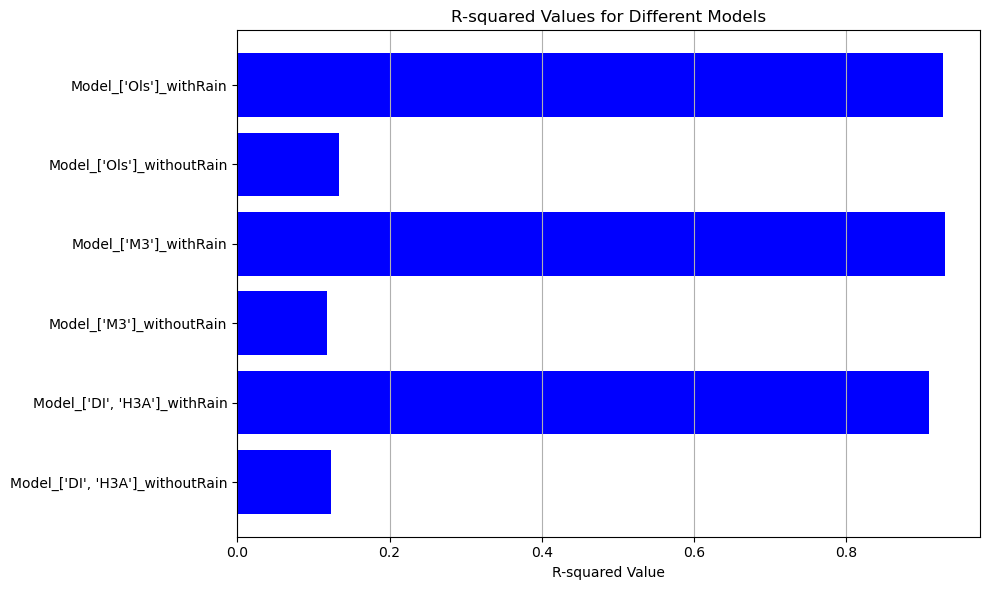

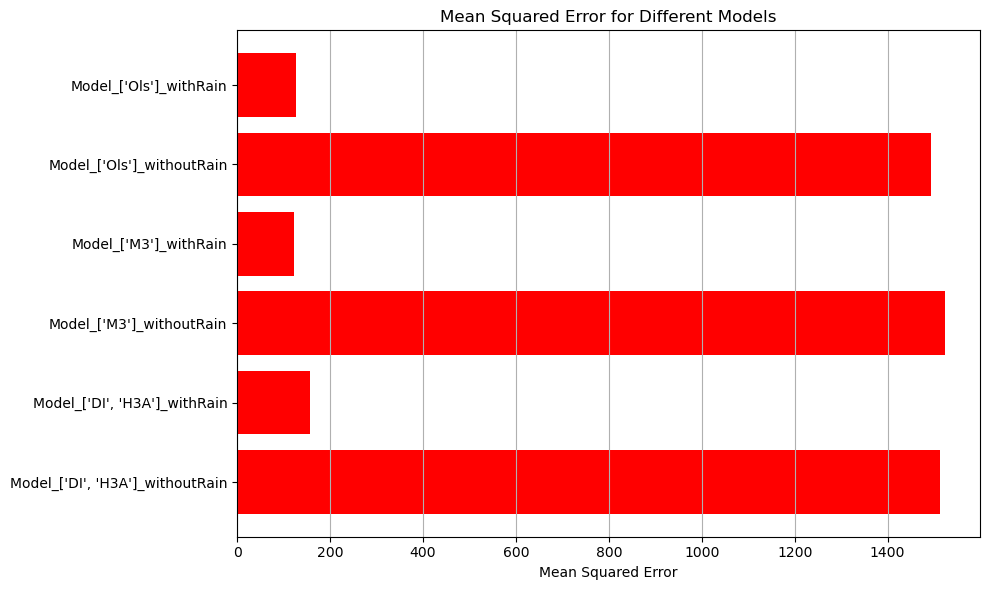

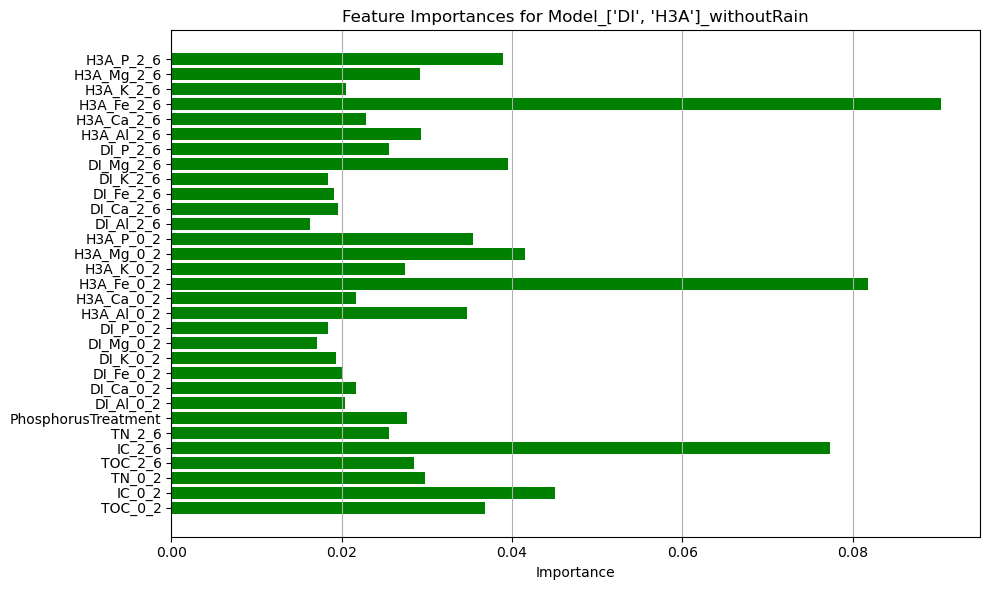

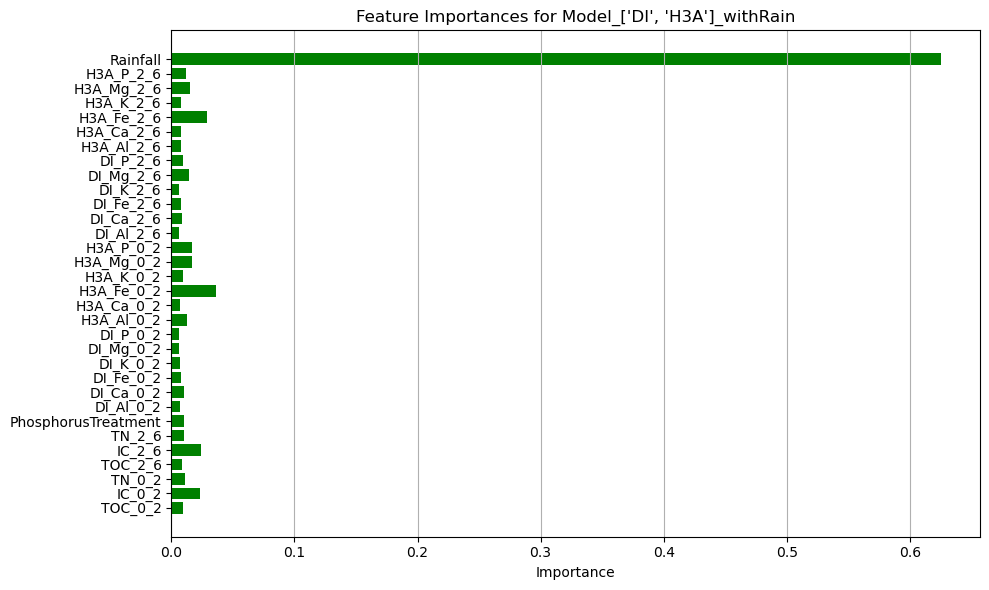

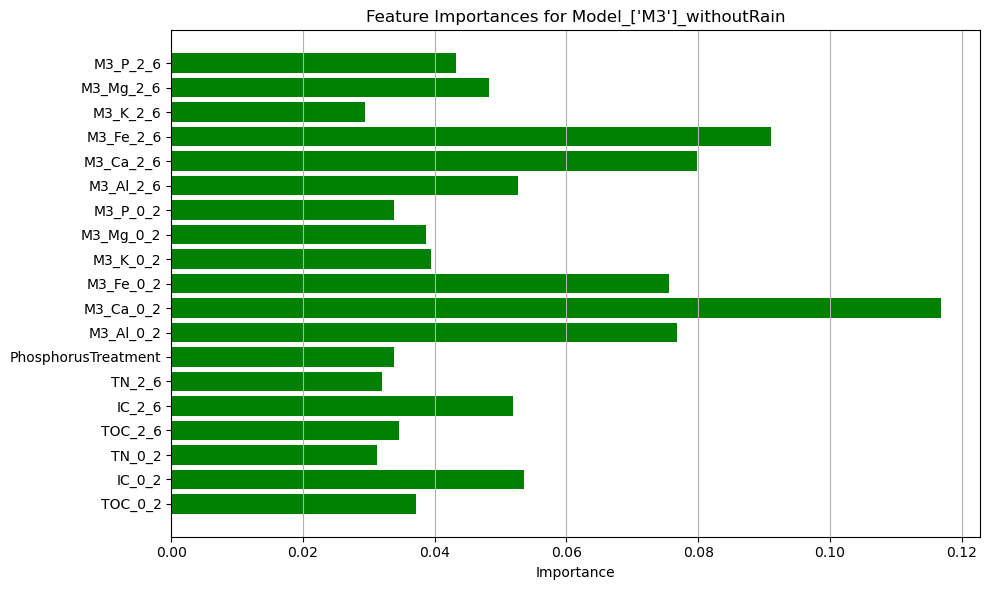

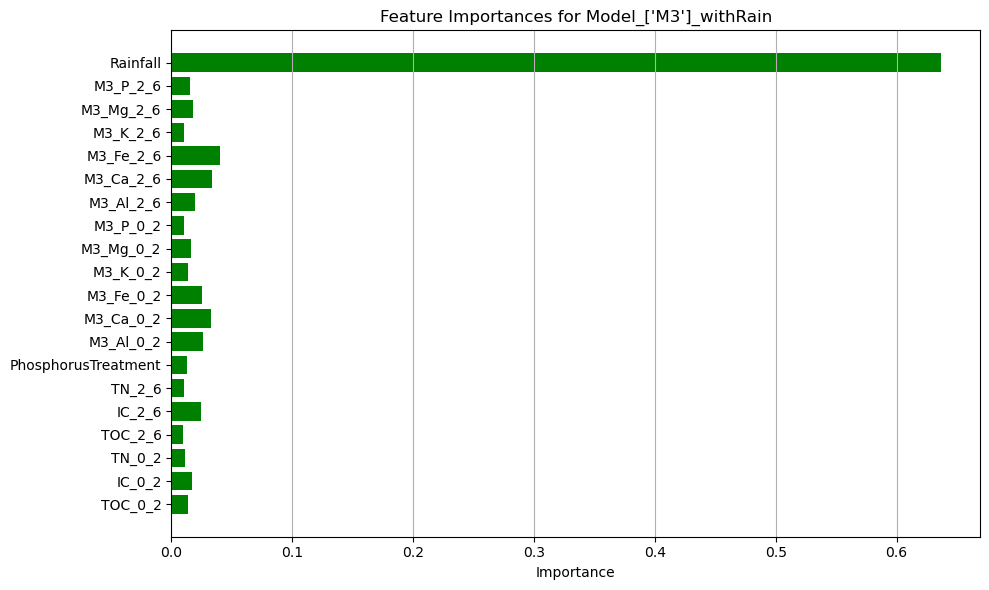

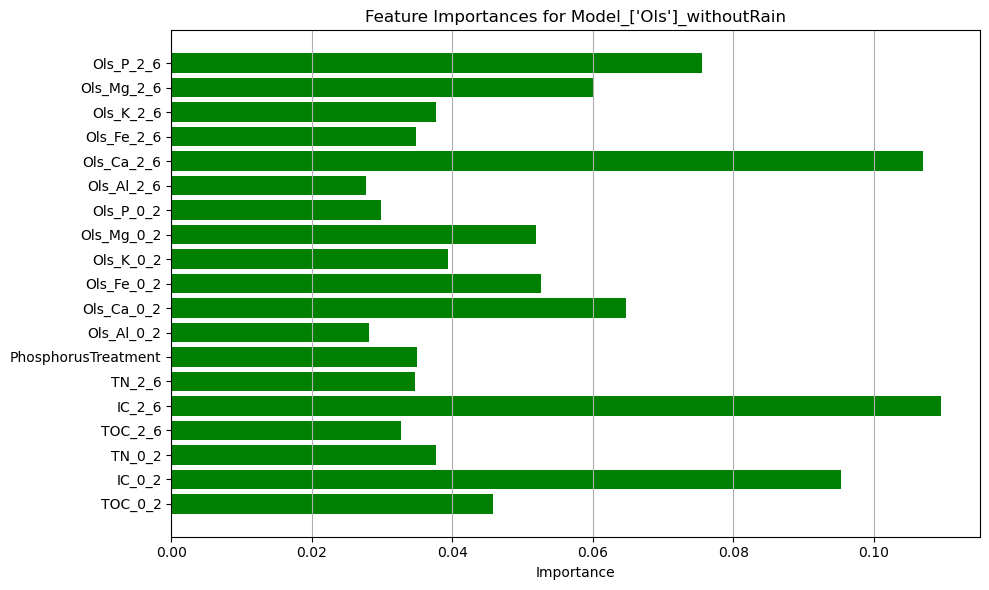

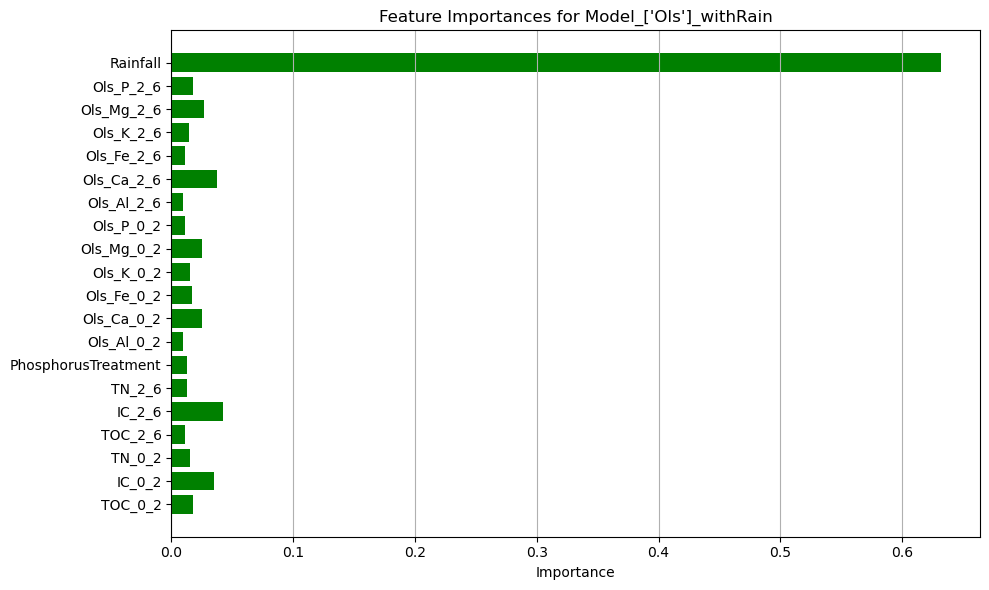

In [24]:
# Extracting model names, r2 values and mse values
model_names = [result['model_name'] for result in all_results]
r2_values = [result['r2'] for result in all_results]
mse_values = [result['mse'] for result in all_results]

# Plotting R-squared values
plt.figure(figsize=(10, 6))
plt.barh(model_names, r2_values, color='blue')
plt.xlabel('R-squared Value')
plt.title('R-squared Values for Different Models')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# Plotting Mean Squared Error values
plt.figure(figsize=(10, 6))
plt.barh(model_names, mse_values, color='red')
plt.xlabel('Mean Squared Error')
plt.title('Mean Squared Error for Different Models')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# Plotting feature importances for each model
for result in all_results:
    plt.figure(figsize=(10, 6))
    features = list(result['features_importances'].keys())
    importances = list(result['features_importances'].values())
    plt.barh(features, importances, color='green')
    plt.xlabel('Importance')
    plt.title(f"Feature Importances for {result['model_name']}")
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()